# EE379K Lab 7

## Irfan Hasan, Peter Zhang

# Question 1

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns

from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [12]:
df = pd.read_csv("cs-training.csv")
df.head(5)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [13]:
df = df.drop('Unnamed: 0', axis=1)

In [14]:
X_train = df.drop('SeriousDlqin2yrs', axis=1)
y_train = df['SeriousDlqin2yrs']

In [15]:
i = 1
for c in X_train.columns:
    X_train['F'+str(i)] = X_train[c]
    i += 1
    X_train = X_train.drop(c, axis=1)

In [16]:
X_train

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [17]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
F1,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
F2,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
F3,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
F4,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
F5,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
F6,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
F7,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
F8,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
F9,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0
F10,146076.0,0.757222,1.115086,0.0,0.000000,0.000000,1.000000,20.0


In [20]:
X_train = X_train.fillna(X_train.mean()) # fill NaN with mean of columns

In [ ]:
X_log = np.log1p(X_train)

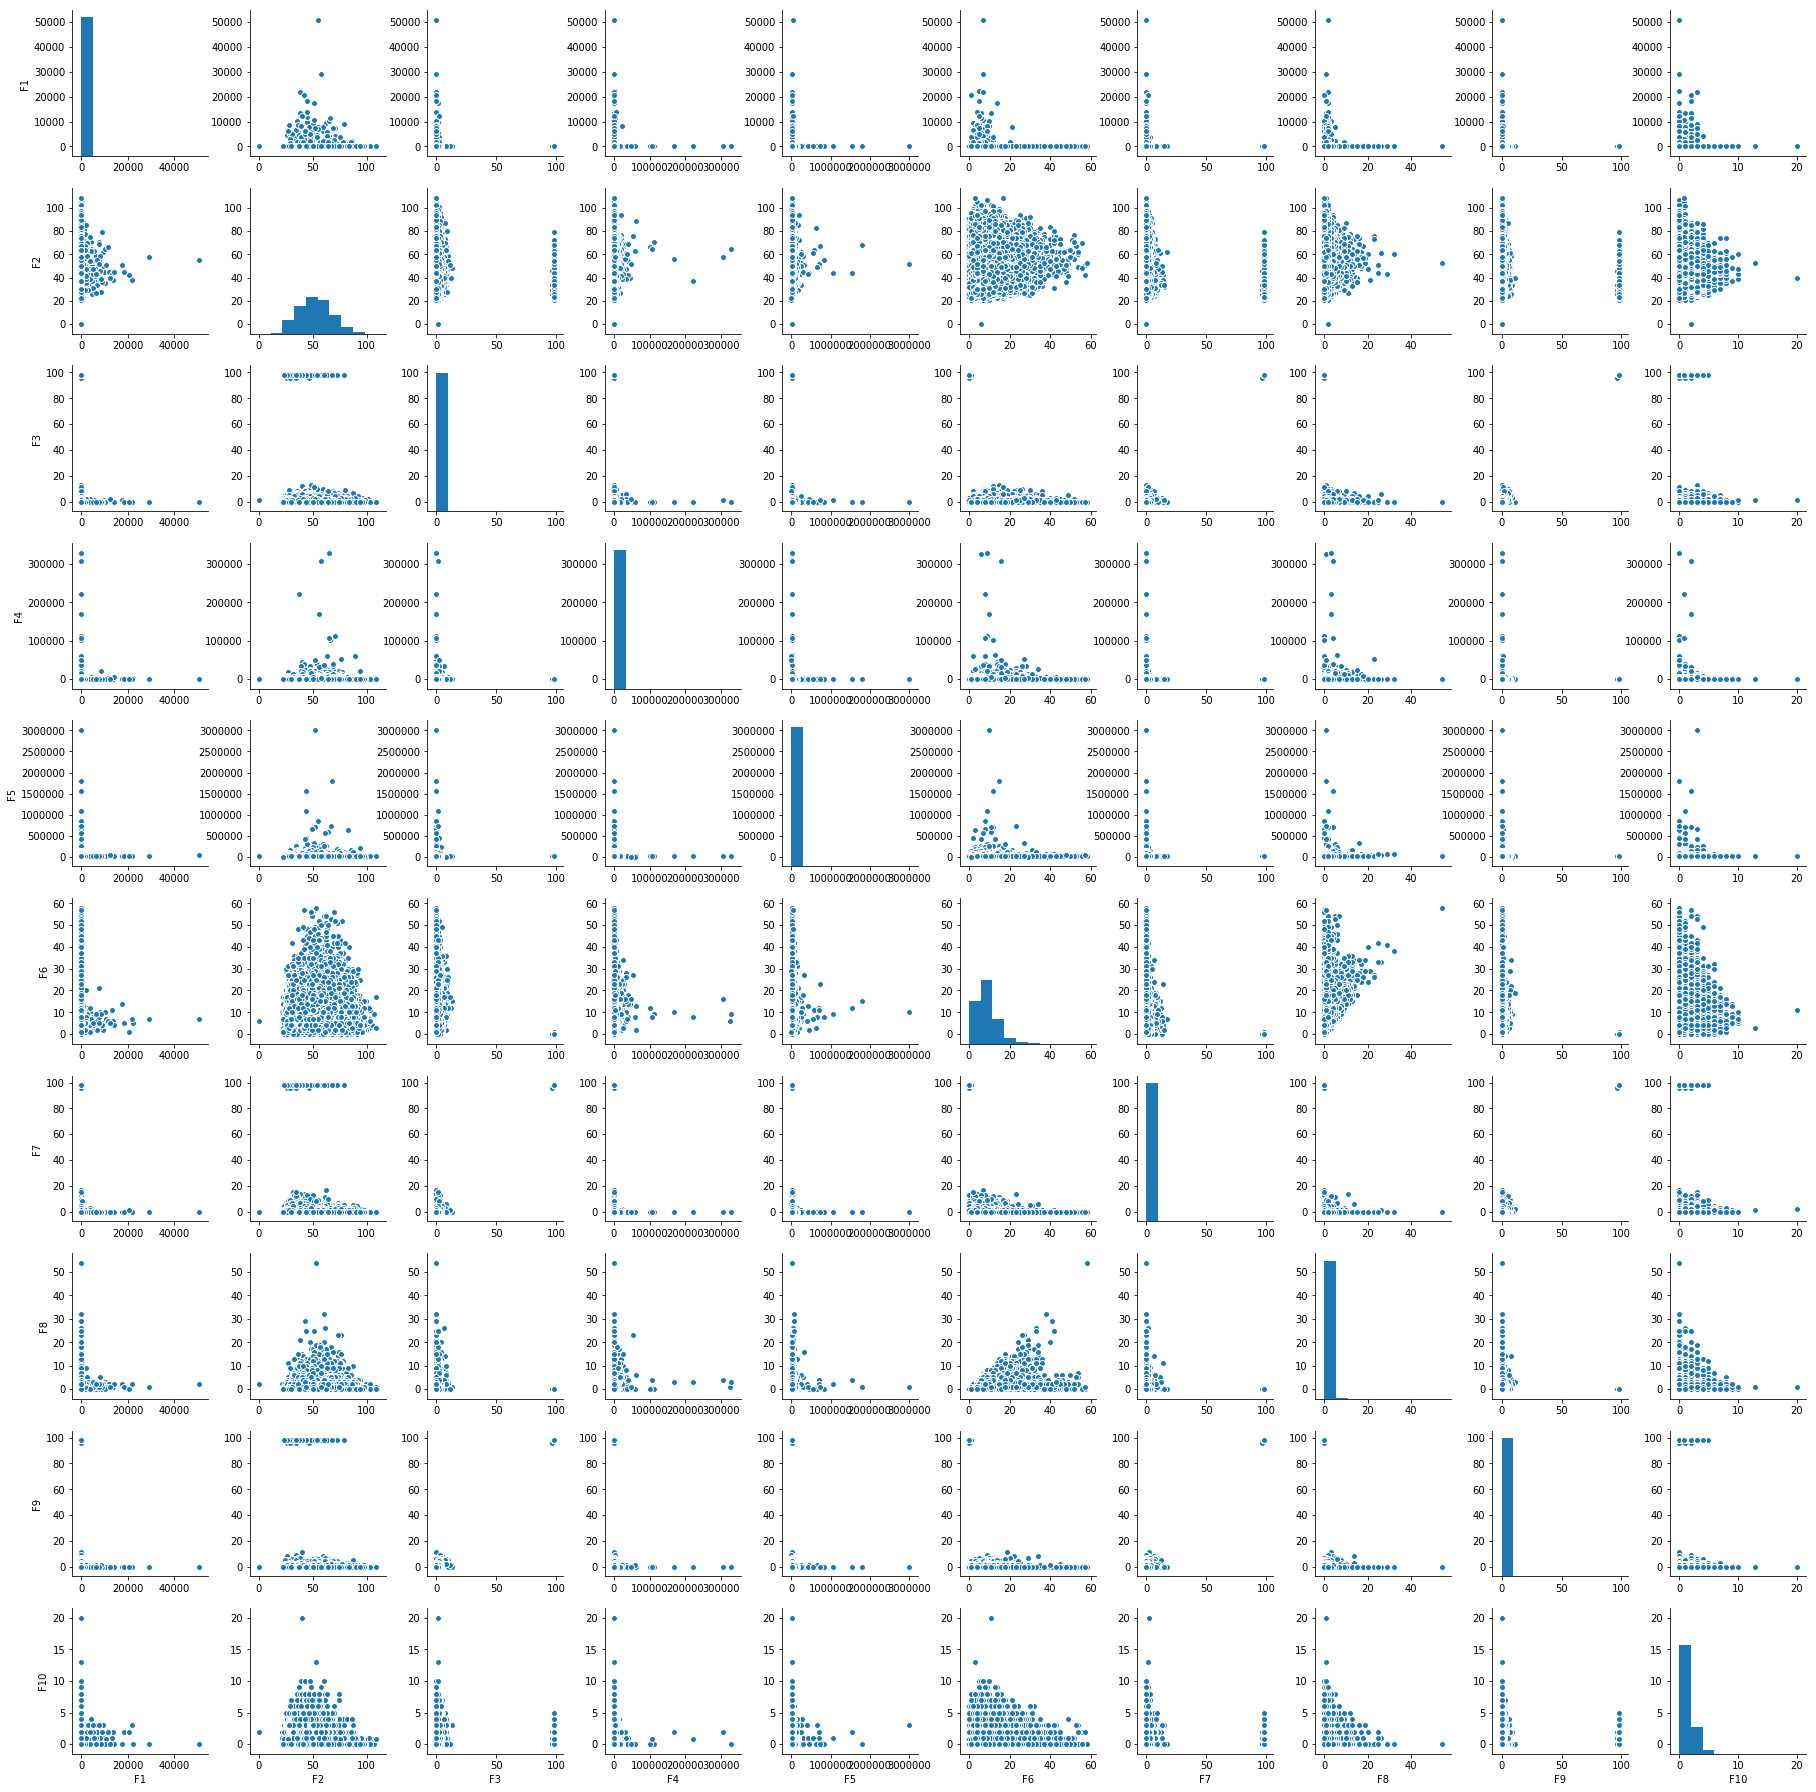

In [21]:
sns.pairplot(X_train)

In [ ]:
sns.pairplot(X_log)